# Problem Statement -:
## Sentiment Analysis on Amazon Product "realme Narzo 50 Pro 5G" Reviews.

About realme Narzo 50 Pro 5G -:

This 5G smart phone was announced on May,18,2022.The phone has 5G network connectivity with GSM,HSPA,LTE Technology as well.Phone has memory storage of 128GB 6GB RAM, 128GB 8GB RAM & have Android 12 OS with Camera of HDR Panorama 48,8,2 MP tripple lense.The price in amazon is INR'21,99'.(Source:https://www.gsmarena.com/)

Sentiment Analysis on realme Narzo 50 Pro 5G : After launching this phone the phone is available for sale on popular e-commerce websites like amazon,flipcart etc. Their user & smartphone lover put their views & comparison on this platform, here we do the sentiment analysis based on their reviews submitted by the users for this product at amazon india.

About the dataset-First need to extract the data from the website necessary steps has taken.The data set is all about the each and every aspect of phone specifications & price comparision with its durability in terms of the reviews given by the users.Let have a look what people are say about this phone are they higly like it, or not or they have an neutral feelings about the product.


In [61]:
# Improting some basic libraries
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

# Web Page Scraping

In [ ]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    
    # Requests sorts cookies= alphabetically
    
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
   
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/realme-Storage-Dimensity-Processor-Display/dp/B09ZBG7J7F/?_encoding=UTF8&pd_rd_i=B09ZBG7J7F&pd_rd_w=NfmEw&content-id=amzn1.sym.8f140b5a-c3b9-4ad8-94f0-98f0f6fe96a3&pf_rd_p=8f140b5a-c3b9-4ad8-94f0-98f0f6fe96a3&pf_rd_r=NKZCWWASW0E5TGXBB1S3&pd_rd_wg=KGwTB&pd_rd_r=98828c60-2e39-4d7b-8057-dfefb6d7675f&ref_=dtdpp50' ,
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

# Apply to Working function

In [ ]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [12]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/dp/B09ZBFD6TJ?th=1')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\VivekG\AppData\Local\Temp\ipykernel_4196\3906491946.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

# Save results to a dataframe

In [18]:

DF = pd.DataFrame(reviewlist)
DF

,Rating,Title,Review,Review_Date
0,4.0,Good smartphone at decent price.,Awesome display and built quality.Camera quali...,5 November 2022
1,4.0,Ok ok,Kabhi kabhi call ki ring aati hai but dikhti n...,5 November 2022
2,4.0,Product is slim and good.,Overall Product is really good. But I've issue...,25 October 2022
3,4.0,Best value for money,"Phone screen is very good, battery life is als...",3 November 2022
4,4.0,Awesome,Good Quality Phone,3 November 2022
...,...,...,...,...
12907,4.0,A great balanced phone but OS needs improvement,Overall a great balanced phone with1) great am...,27 October 2022
12908,4.0,Perfect balanced device,I was purchase that phone in 16700 and in thi...,14 October 2022
12909,4.0,A Complete All Rounder mobile @15K With butter...,Pros; (Using since 1 month)1.Good processor(Mt...,19 October 2022
12910,4.0,Good phone camera is decent,1) performance is good gaming bgmi 60 fps good...,4 November 2022


# Extract the data set to CSV 

In [19]:
DF.to_csv('C:/Users/VivekG/Desktop/My Files- Vivek/ExcelrThane/DS/Assignments/Txt Mining/Amazon_Reviews_realme Narzo 50 Pro 5G.csv')

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
warnings.filterwarnings('ignore')
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import nltk
from string import punctuation
from nltk.stem.porter import *

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings

%matplotlib inline


from wordcloud import WordCloud, STOPWORDS

from matplotlib.pyplot import imread

from textblob import TextBlob


from string import punctuation
from nltk.stem.porter import *

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer



# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt 

# Load The Data

In [38]:
reviews_amzn=pd.read_csv('C:/Users/VivekG/Desktop/My Files- Vivek/ExcelrThane/DS/Assignments/Txt Mining/Amazon_Reviews_realme Narzo 50 Pro 5G_N.csv')

reviews_amzn = reviews_amzn.loc[:, ~reviews_amzn.columns.str.contains('^Unnamed')]

reviews_amzn.head()

,Sr.No,Rating,Title,Review,Review_Date
0,0,4,Good smartphone at decent price.,Awesome display and built quality.Camera quali...,25 Oct 2022
1,1,4,Ok ok,Kabhi kabhi call ki ring aati hai but dikhti n...,28 Oct 2022
2,2,4,Product is slim and good.,Overall Product is really good. But I've issue...,29 Oct 2022
3,3,4,Best value for money,"Phone screen is very good, battery life is als...",29 Oct 2022
4,4,4,Awesome,Good Quality Phone,16 Oct 2022


# EDA

In [39]:
# Removing Sr no column
reviews_amzn.drop(['Sr.No'],inplace=True,axis=1)
reviews_amzn.head()

,Rating,Title,Review,Review_Date
0,4,Good smartphone at decent price.,Awesome display and built quality.Camera quali...,25 Oct 2022
1,4,Ok ok,Kabhi kabhi call ki ring aati hai but dikhti n...,28 Oct 2022
2,4,Product is slim and good.,Overall Product is really good. But I've issue...,29 Oct 2022
3,4,Best value for money,"Phone screen is very good, battery life is als...",29 Oct 2022
4,4,Awesome,Good Quality Phone,16 Oct 2022


In [40]:
reviews_amzn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       5000 non-null   int64 
 1   Title        5000 non-null   object
 2   Review       4684 non-null   object
 3   Review_Date  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [41]:
reviews_amzn.describe()

,Rating
count,5000.000000
mean,4.236200
std,1.059355
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [42]:
# Number of Word in a single Review.

reviews_amzn['word_count'] = reviews_amzn['Review'].apply(lambda x: len(str(x).split(" ")))
reviews_amzn[['Review','word_count']].head()

,Review,word_count
0,Awesome display and built quality.Camera quali...,33
1,Kabhi kabhi call ki ring aati hai but dikhti n...,15
2,Overall Product is really good. But I've issue...,95
3,"Phone screen is very good, battery life is als...",22
4,Good Quality Phone,3


In [43]:
# Number of characters in a single Review.

reviews_amzn['char_count'] = reviews_amzn['Review'].str.len() ## this also includes spaces
reviews_amzn[['Review','char_count']].head()
                                         

,Review,char_count
0,Awesome display and built quality.Camera quali...,183.0
1,Kabhi kabhi call ki ring aati hai but dikhti n...,76.0
2,Overall Product is really good. But I've issue...,572.0
3,"Phone screen is very good, battery life is als...",113.0
4,Good Quality Phone,18.0


In [44]:
# Average Word Length of a single Review.

def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews_amzn['avg_word'] = reviews_amzn['Review'].apply(lambda x: avg_word(x))
reviews_amzn[['Review','avg_word']].head()

,Review,avg_word
0,Awesome display and built quality.Camera quali...,4.575758
1,Kabhi kabhi call ki ring aati hai but dikhti n...,4.133333
2,Overall Product is really good. But I've issue...,5.085106
3,"Phone screen is very good, battery life is als...",4.181818
4,Good Quality Phone,5.333333


In [45]:
# No of StopWords

from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews_amzn['stopwords'] = reviews_amzn['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews_amzn[['Review','stopwords']].head()

,Review,stopwords
0,Awesome display and built quality.Camera quali...,12
1,Kabhi kabhi call ki ring aati hai but dikhti n...,1
2,Overall Product is really good. But I've issue...,31
3,"Phone screen is very good, battery life is als...",10
4,Good Quality Phone,0


In [46]:
# No of Special Characters

reviews_amzn['hashtags'] = reviews_amzn['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews_amzn[['Review','hashtags']].head()

,Review,hashtags
0,Awesome display and built quality.Camera quali...,0
1,Kabhi kabhi call ki ring aati hai but dikhti n...,0
2,Overall Product is really good. But I've issue...,0
3,"Phone screen is very good, battery life is als...",0
4,Good Quality Phone,0


In [47]:
# Count of Numerical characters in Review.

reviews_amzn['numerics'] = reviews_amzn['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews_amzn[['Review','numerics']].head()


,Review,numerics
0,Awesome display and built quality.Camera quali...,0
1,Kabhi kabhi call ki ring aati hai but dikhti n...,0
2,Overall Product is really good. But I've issue...,1
3,"Phone screen is very good, battery life is als...",0
4,Good Quality Phone,0


In [48]:
# No of Uppercase word in Review.

reviews_amzn['upper'] = reviews_amzn['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews_amzn[['Review','upper']].head()


,Review,upper
0,Awesome display and built quality.Camera quali...,0
1,Kabhi kabhi call ki ring aati hai but dikhti n...,0
2,Overall Product is really good. But I've issue...,3
3,"Phone screen is very good, battery life is als...",0
4,Good Quality Phone,0


In [49]:
from textblob import TextBlob

# Spelling Correction

reviews_amzn['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Awesome display and built quality.Camera quali...
1    Rabbi rabbi call i ring anti had but dikhti na...
2    Overall Product is really good. But I've issue...
3    Shone screen is very good, battery life is als...
4                                   Good Quality Shone
Name: Review, dtype: object

# Feature Engineering


In [50]:
print(reviews_amzn['Review_Date'].str.split(' ').str[0],'\n',
      reviews_amzn['Review_Date'].str.split(' ').str[1],'\n',
      reviews_amzn['Review_Date'].str.split(' ').str[2])

0       25
1       28
2       29
3       29
4       16
        ..
4995    24
4996     7
4997     6
4998     7
4999     9
Name: Review_Date, Length: 5000, dtype: object 
 0       Oct
1       Oct
2       Oct
3       Oct
4       Oct
       ... 
4995    Apr
4996    Mar
4997    Mar
4998    Apr
4999    Mar
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


In [51]:
df=reviews_amzn.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,25,Oct,2022
1,28,Oct,2022
2,29,Oct,2022
3,29,Oct,2022
4,16,Oct,2022
...,...,...,...
4995,24,Apr,2022
4996,7,Mar,2022
4997,6,Mar,2022
4998,7,Apr,2022


In [52]:
df.fillna('0')

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,4,Good smartphone at decent price.,Awesome display and built quality.Camera quali...,25 Oct 2022,33,183.0,4.575758,12,0,0,0,25,Oct,2022
1,4,Ok ok,Kabhi kabhi call ki ring aati hai but dikhti n...,28 Oct 2022,15,76.0,4.133333,1,0,0,0,28,Oct,2022
2,4,Product is slim and good.,Overall Product is really good. But I've issue...,29 Oct 2022,95,572.0,5.085106,31,0,1,3,29,Oct,2022
3,4,Best value for money,"Phone screen is very good, battery life is als...",29 Oct 2022,22,113.0,4.181818,10,0,0,0,29,Oct,2022
4,4,Awesome,Good Quality Phone,16 Oct 2022,3,18.0,5.333333,0,0,0,0,16,Oct,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,The service and phone both are not good,The worst phone i ever used only in one month ...,24 Apr 2022,47,230.0,3.914894,20,0,2,1,24,Apr,2022
4996,5,Supar,Suprr,7 Mar 2022,1,5.0,5.000000,0,0,0,0,7,Mar,2022
4997,1,Worse phone ever,1. Phone Call problem While making a phone ca...,6 Mar 2022,83,444.0,4.469136,28,0,0,5,6,Mar,2022
4998,1,Unable to use whatsapp!,"After lot of research, got this phone for my 1...",7 Apr 2022,47,250.0,4.340426,20,0,0,0,7,Apr,2022


In [63]:
df.Month.value_counts()

Mar    975
Apr    833
May    615
Jun    567
Aug    509
Jul    477
Oct    444
Sep    385
Feb    194
Nov      1
Name: Month, dtype: int64

# Change Month from words to numbers 

In [64]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,Oct
1,Oct
2,Oct
3,Oct
4,Oct
...,...
4995,Apr
4996,Mar
4997,Mar
4998,Apr


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   int64  
 1   Title        5000 non-null   object 
 2   Review       4684 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   word_count   5000 non-null   int64  
 5   char_count   4684 non-null   float64
 6   avg_word     5000 non-null   float64
 7   stopwords    5000 non-null   int64  
 8   hashtags     5000 non-null   int64  
 9   numerics     5000 non-null   int64  
 10  upper        5000 non-null   int64  
 11  Date         5000 non-null   object 
 12  Month        5000 non-null   object 
 13  Year         5000 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


In [66]:
df1[['Date','Year']]=df1[['Date','Year']].astype('object')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   int64  
 1   Title        5000 non-null   object 
 2   Review       4684 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   word_count   5000 non-null   int64  
 5   char_count   4684 non-null   float64
 6   avg_word     5000 non-null   float64
 7   stopwords    5000 non-null   int64  
 8   hashtags     5000 non-null   int64  
 9   numerics     5000 non-null   int64  
 10  upper        5000 non-null   int64  
 11  Date         5000 non-null   object 
 12  Month        5000 non-null   object 
 13  Year         5000 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


In [67]:
df1.head()

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,4,Good smartphone at decent price.,Awesome display and built quality.Camera quali...,25 Oct 2022,33,183.0,4.575758,12,0,0,0,25,Oct,2022
1,4,Ok ok,Kabhi kabhi call ki ring aati hai but dikhti n...,28 Oct 2022,15,76.0,4.133333,1,0,0,0,28,Oct,2022
2,4,Product is slim and good.,Overall Product is really good. But I've issue...,29 Oct 2022,95,572.0,5.085106,31,0,1,3,29,Oct,2022
3,4,Best value for money,"Phone screen is very good, battery life is als...",29 Oct 2022,22,113.0,4.181818,10,0,0,0,29,Oct,2022
4,4,Awesome,Good Quality Phone,16 Oct 2022,3,18.0,5.333333,0,0,0,0,16,Oct,2022


In [68]:
df
df.drop(['word_count','char_count','avg_word','stopwords','hashtags','numerics','upper','Review_Date'], axis=1)

,Rating,Title,Review,Date,Month,Year
0,4,Good smartphone at decent price.,Awesome display and built quality.Camera quali...,25,Oct,2022
1,4,Ok ok,Kabhi kabhi call ki ring aati hai but dikhti n...,28,Oct,2022
2,4,Product is slim and good.,Overall Product is really good. But I've issue...,29,Oct,2022
3,4,Best value for money,"Phone screen is very good, battery life is als...",29,Oct,2022
4,4,Awesome,Good Quality Phone,16,Oct,2022
...,...,...,...,...,...,...
4995,1,The service and phone both are not good,The worst phone i ever used only in one month ...,24,Apr,2022
4996,5,Supar,Suprr,7,Mar,2022
4997,1,Worse phone ever,1. Phone Call problem While making a phone ca...,6,Mar,2022
4998,1,Unable to use whatsapp!,"After lot of research, got this phone for my 1...",7,Apr,2022


In [69]:
# Data Visualization
# date versus review count

# Data Visualization

Date Vs Review Count

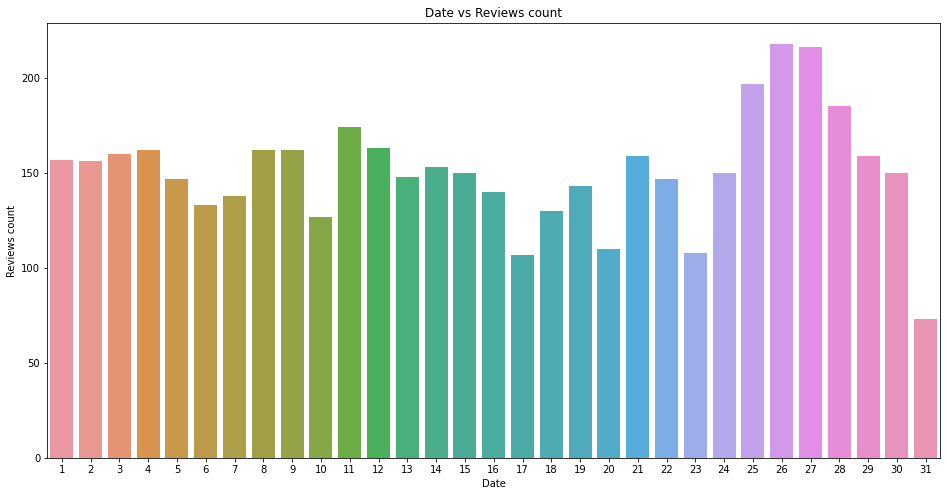

In [70]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

% of Ratings

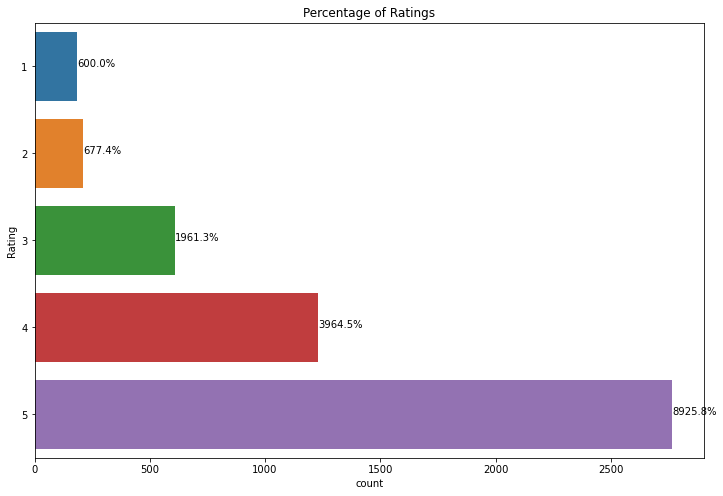

In [71]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = df)
total = len(dayreview)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

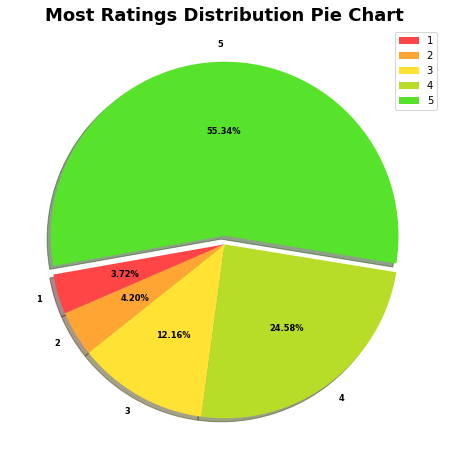

In [72]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

Monthwise Ratings

<AxesSubplot:xlabel='Month'>

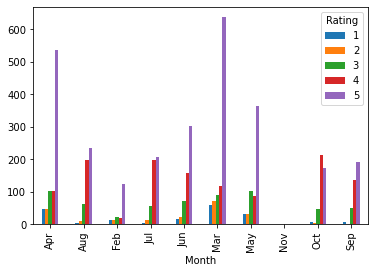

In [73]:
figsize: (12, 8) 
pd.crosstab(df.Month,df.Rating).plot(kind="bar")

# Text Preprocessing

In [74]:
data = df[['Review']]
data

,Review
0,Awesome display and built quality.Camera quali...
1,Kabhi kabhi call ki ring aati hai but dikhti n...
2,Overall Product is really good. But I've issue...
3,"Phone screen is very good, battery life is als..."
4,Good Quality Phone
...,...
4995,The worst phone i ever used only in one month ...
4996,Suprr
4997,1. Phone Call problem While making a phone ca...
4998,"After lot of research, got this phone for my 1..."


In [75]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [76]:
data

,Review
0,awesome display built quality.camera quality b...
1,kabhi kabhi call ki ring aati hai dikhti nahi ...
2,overall product really good. but i've issues b...
3,"phone screen good, battery life also good, cam..."
4,good quality phone
...,...
4995,the worst phone ever used one month display we...
4996,suprr
4997,1. phone call problem while making phone call ...
4998,"after lot research, got phone 18yr son studyin..."


# Cleaning the text by removing irrelevant information

In [77]:
import re #regular expression
import string

def clean_text(text):
    
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

# Clean The Text
data["Review"] = data["Review"].apply(clean_text)
data.head()

,Review
0,awesome display built qualitycamera quality be...
1,kabhi kabhi call ki ring aati hai dikhti nahi ...
2,overall product really good but ive issues bsn...
3,phone screen good battery life also good camer...
4,good quality phone


# Word frequency

In [78]:
freq = pd.Series(' '.join(data['Review']).split()).value_counts()[:20] # for top 20
freq

good        2120
phone       1774
camera      1201
battery      932
i            906
quality      815
mobile       534
one          514
nice         480
the          393
product      372
best         359
fast         352
like         351
oneplus      345
price        343
charging     324
nan          316
life         306
plus         288
dtype: int64

In [79]:
# Remove Punctuations

data['Review'] = data['Review'].str.replace('[^\w\s]','')
data['Review'].head()

0    awesome display built qualitycamera quality be...
1    kabhi kabhi call ki ring aati hai dikhti nahi ...
2    overall product really good but ive issues bsn...
3    phone screen good battery life also good camer...
4                                   good quality phone
Name: Review, dtype: object

In [80]:
# Removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

data['Review'].head()

0    awesome display built qualitycamera quality be...
1    kabhi kabhi call ki ring aati hai dikhti nahi ...
2    overall product really good ive issues bsnl ne...
3    phone screen good battery life also good camer...
4                                   good quality phone
Name: Review, dtype: object

In [81]:
# Word frequency after removal of stopwords

freq_SW = pd.Series(' '.join(data['Review']).split()).value_counts()[:20] # for top 20
freq_SW

good           2125
phone          1776
camera         1208
battery         935
quality         816
mobile          534
one             515
nice            482
product         372
best            360
fast            353
like            351
price           346
oneplus         345
charging        324
nan             316
life            308
plus            288
also            287
performance     271
dtype: int64

In [82]:
# Removal of Common words

freq = pd.Series(' '.join(data['Review']).split()).value_counts()[:10]
freq

good       2125
phone      1776
camera     1208
battery     935
quality     816
mobile      534
one         515
nice        482
product     372
best        360
dtype: int64

In [83]:
# Removal of Uncommon words

freq = pd.Series(' '.join(data['Review']).split()).value_counts()[-10:]
freq

prize              1
expectedtotally    1
defects            1
lovebit            1
phoneprocessor     1
timetouch          1
greatgaming        1
dayspeaker         1
loudother          1
badall             1
dtype: int64

# Remove emoji

In [84]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data.head()

,Review
0,awesome display built qualitycamera quality be...
1,kabhi kabhi call ki ring aati hai dikhti nahi ...
2,overall product really good ive issues bsnl ne...
3,phone screen good battery life also good camer...
4,good quality phone


In [85]:
# Spelling correction

data['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    awesome display built qualitycamera quality be...
1    rabbi rabbi call i ring anti had dikhti nasi h...
2    overall product really good give issues bone n...
3    phone screen good battery life also good camer...
4                                   good quality phone
Name: Review, dtype: object

In [86]:
# Frequency List

freq = list(freq.index)
data['Review'] = data['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Review'].head()

0    awesome display built qualitycamera quality be...
1    kabhi kabhi call ki ring aati hai dikhti nahi ...
2    overall product really good ive issues bsnl ne...
3    phone screen good battery life also good camer...
4                                   good quality phone
Name: Review, dtype: object

# Tokenization

In [87]:
TextBlob(data['Review'][1]).words

WordList(['kabhi', 'kabhi', 'call', 'ki', 'ring', 'aati', 'hai', 'dikhti', 'nahi', 'choti', 'choti', 'problem', 'hai'])

# Stemming

In [88]:
from nltk.stem import PorterStemmer
Stm = PorterStemmer()
data['Review'][:10].apply(lambda x: " ".join([Stm.stem(word) for word in x.split()]))

0    awesom display built qualitycamera qualiti bes...
1    kabhi kabhi call ki ring aati hai dikhti nahi ...
2    overal product realli good ive issu bsnl netwo...
3    phone screen good batteri life also good camer...
4                                   good qualiti phone
5                                good look smart phone
6    look camera phone one averag camera qualiti go...
7                                         good product
8                                                 nice
9                                                 good
Name: Review, dtype: object

# Lemmatization


In [89]:
import nltk
from textblob import Word
data['Review'] = data['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Review'].head()

0    awesome display built qualitycamera quality be...
1    kabhi kabhi call ki ring aati hai dikhti nahi ...
2    overall product really good ive issue bsnl net...
3    phone screen good battery life also good camer...
4                                   good quality phone
Name: Review, dtype: object

# Word Frequency using count vectoriser

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data['Review'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

#print(word_freq_df.sort('occurrences',ascending = False).head())

In [91]:
word_freq_df.head(25)

,term,occurrences,frequency
0,aa,5,0.000117
1,aacha,1,0.000023
2,aane,1,0.000023
3,aap,2,0.000047
4,aata,1,0.000023
5,aati,1,0.000023
6,aaya,1,0.000023
7,aayega,1,0.000023
8,aayi,2,0.000047
9,ab,1,0.000023


# TFIDF
(Term frequency inverse Document Frequency)

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data['Review'])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
DF = pd.DataFrame(denselist, columns = names_features)
DF


,aa,able,absolutely,accept,accessory,accha,according,accurate,acha,activity,...,wrost,ye,year,yes,youtube,zoom,zooming,अचछ,बटर,बहत
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-grams

In [93]:
TextBlob(data['Review'][1]).ngrams(2)

[WordList(['kabhi', 'kabhi']),
 WordList(['kabhi', 'call']),
 WordList(['call', 'ki']),
 WordList(['ki', 'ring']),
 WordList(['ring', 'aati']),
 WordList(['aati', 'hai']),
 WordList(['hai', 'dikhti']),
 WordList(['dikhti', 'nahi']),
 WordList(['nahi', 'choti']),
 WordList(['choti', 'choti']),
 WordList(['choti', 'problem']),
 WordList(['problem', 'hai'])]

# Bi-gram

In [94]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [95]:
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]


In [96]:
top2_words = get_top_n2_words(data["Review"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,camera quality,369
1,one plus,255
2,battery life,249
3,medium could,185
4,could loaded,185


# Plot the Bi-gram

[Text(0, 0, 'camera quality'),
 Text(1, 0, 'one plus'),
 Text(2, 0, 'battery life'),
 Text(3, 0, 'medium could'),
 Text(4, 0, 'could loaded'),
 Text(5, 0, 'good phone'),
 Text(6, 0, 'battery backup'),
 Text(7, 0, 'quality good'),
 Text(8, 0, 'camera good'),
 Text(9, 0, 'fast charging')]

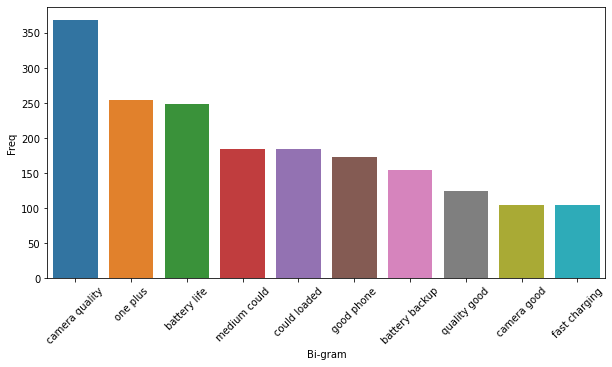

In [97]:
top10_bigram = top2_df.iloc[0:10,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top10_bigram["Bi-gram"],y=top10_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top10_bigram["Bi-gram"])


# Tri-gram

In [98]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [99]:
top3_words = get_top_n3_words(data["Review"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head()

,Tri-gram,Freq
0,medium could loaded,185
1,camera quality good,76
2,battery life good,43
3,one plus nord,36
4,good battery life,32


# Plot the Tri-gram

[Text(0, 0, 'medium could loaded'),
 Text(1, 0, 'camera quality good'),
 Text(2, 0, 'battery life good'),
 Text(3, 0, 'one plus nord'),
 Text(4, 0, 'good battery life'),
 Text(5, 0, 'good camera quality'),
 Text(6, 0, 'phone price range'),
 Text(7, 0, 'battery backup good'),
 Text(8, 0, 'could loaded good'),
 Text(9, 0, 'oneplus nord ce')]

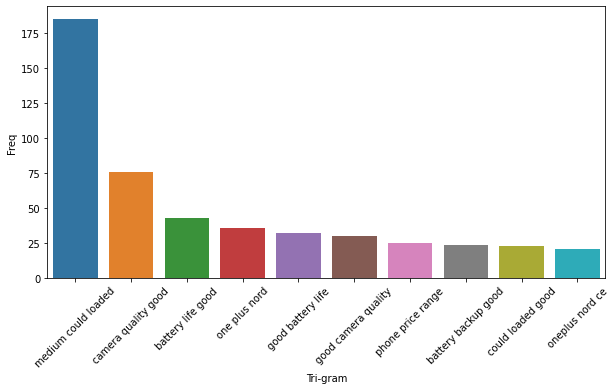

In [100]:
top10_trigram = top3_df.iloc[0:10,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top10_trigram["Tri-gram"],y=top10_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top10_trigram["Tri-gram"])

# WordCloud

In [101]:
string_Total = " ".join(data["Review"])

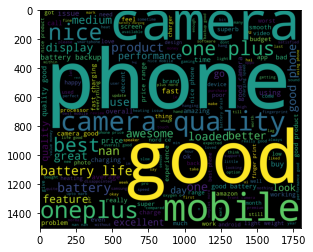

In [102]:
#wordcloud for entire corpus


wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Sentiment Analysis

In [103]:
data["Review"][:10].apply(lambda x: TextBlob(x).sentiment)

0    (0.37291666666666673, 0.4458333333333333)
1                                   (0.0, 0.0)
2    (0.30606060606060603, 0.4469696969696971)
3     (0.6499999999999999, 0.5750000000000001)
4                    (0.7, 0.6000000000000001)
5    (0.45714285714285713, 0.6214285714285714)
6                                (0.3125, 0.4)
7                    (0.7, 0.6000000000000001)
8                                   (0.6, 1.0)
9                    (0.7, 0.6000000000000001)
Name: Review, dtype: object

In [104]:
data['sentiment'] = data["Review"].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Review','sentiment']].head(10)

,Review,sentiment
0,awesome display built qualitycamera quality be...,0.372917
1,kabhi kabhi call ki ring aati hai dikhti nahi ...,0.000000
2,overall product really good ive issue bsnl net...,0.306061
3,phone screen good battery life also good camer...,0.650000
4,good quality phone,0.700000
5,good looking smart phone,0.457143
6,looking camera phone one average camera qualit...,0.312500
7,good product,0.700000
8,nice,0.600000
9,good,0.700000


# Subjectivity and polarity

In [105]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)

data.head()

,Review,sentiment,subjectivity,polarity
0,awesome display built qualitycamera quality be...,0.372917,0.445833,0.372917
1,kabhi kabhi call ki ring aati hai dikhti nahi ...,0.000000,0.000000,0.000000
2,overall product really good ive issue bsnl net...,0.306061,0.446970,0.306061
3,phone screen good battery life also good camer...,0.650000,0.575000,0.650000
4,good quality phone,0.700000,0.600000,0.700000


# Making a worlcloud

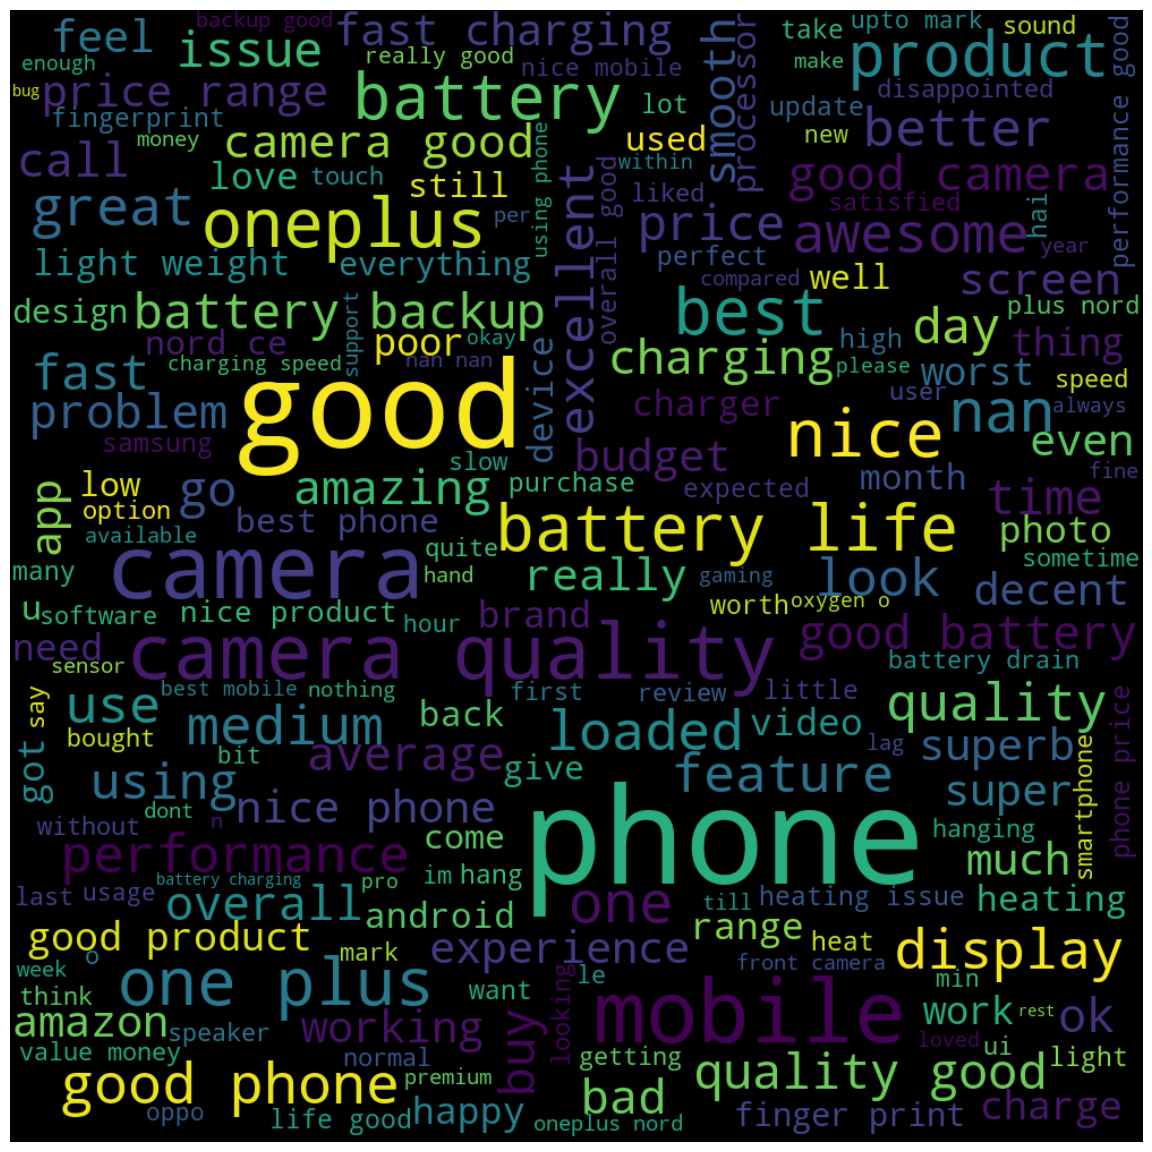

In [106]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in data["Review"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(15, 15), dpi=100)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Compute The Negative, Neutral, Positive Analysis

In [107]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
data["analysis"] = data["polarity"].apply(analysis)
data

,Review,sentiment,subjectivity,polarity,analysis
0,awesome display built qualitycamera quality be...,0.372917,0.445833,0.372917,Positive
1,kabhi kabhi call ki ring aati hai dikhti nahi ...,0.000000,0.000000,0.000000,Neutral
2,overall product really good ive issue bsnl net...,0.306061,0.446970,0.306061,Positive
3,phone screen good battery life also good camer...,0.650000,0.575000,0.650000,Positive
4,good quality phone,0.700000,0.600000,0.700000,Positive
...,...,...,...,...,...
4995,worst phone ever used one month display went b...,-0.100000,0.650000,-0.100000,Negative
4996,suprr,0.000000,0.000000,0.000000,Neutral
4997,phone call problem making phone call sometimes...,0.300000,0.100000,0.300000,Positive
4998,lot research got phone son studying punepoor k...,-0.028409,0.488636,-0.028409,Negative


In [108]:
positive_reviews = data[data['analysis'] == 'Positive']
negative_reviews = data[data['analysis'] == 'Negative']

print('positive reviews')
for i, row in positive_reviews[:5].iterrows():
  print(' -' + row['Review'])

print('negative reviews')
for i, row in negative_reviews[:5].iterrows():
  print(' -' + row['Review'])

positive reviews
 -awesome display built qualitycamera quality best classat first battery life seems issue last full day charger fast take half hour full
 -overall product really good ive issue bsnl network particularly productand residential area good network bsnlwith using phone ive experienced poor network connectivity clear sound frequently call get disconnectednb issue network using sim card old poco timethanks team amazon considering issue refunding money people really good star serviceive ordered redmi note pro plus amazon
 -phone screen good battery life also good camera could better price good
 -good quality phone
 -good looking smart phone
negative reviews
 -battery backup bad
 -front camera quality poor
 -average phone
 -careful buy camera quality bad whitish tone every photo video even gcam help type c port support dongle dac software experience smooth oneplus curtailed subtle feature found flagship feel hand good feel sturdy
 -camera worst partcan take decent image like ch

# Plotting Sentiment Analysis

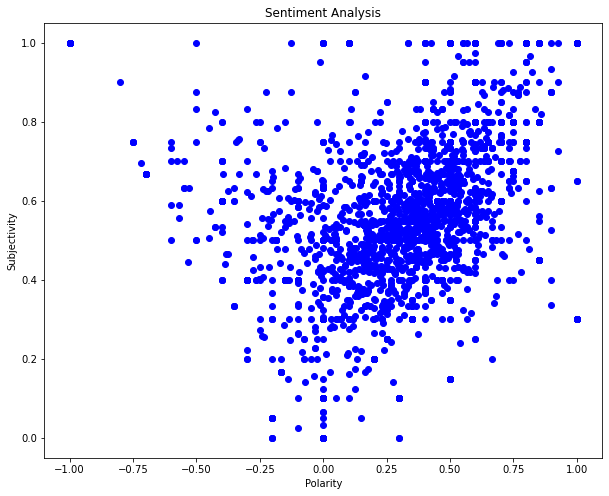

In [109]:
plt.figure(figsize=(10, 8))

for i in range(0, data.shape[0]):
    plt.scatter(data["polarity"][i], data["subjectivity"][i], color = "Blue")

plt.title("Sentiment Analysis") 
plt.xlabel("Polarity")
plt.ylabel("Subjectivity") 
plt.show() 

In [110]:
len(positive_reviews)

3457

In [111]:
len(negative_reviews)

387

In [112]:
len(positive_reviews)/len(negative_reviews)

8.9328165374677

# Conclusion-:

The positive ratio is higher than negetive reviews on the product"realme Narzo 50 Pro 5G". At the end of this analysis we can assume that most of the people like this phone in aspects of it's specification, price and other paramenters which users like to have in their smartphones.